## **Problem Statement**

### Business Context

In today's dynamic business landscape, organizations are increasingly recognizing the pivotal role customer feedback plays in shaping the trajectory of their products and services. The ability to swiftly and effectively respond to customer input not only fosters enhanced customer experiences but also serves as a catalyst for growth, prolonged customer engagement, and the nurturing of lifetime value relationships. As a dedicated Product Manager or Product Analyst, staying attuned to the voice of your customers is not just a best practice; it's a strategic imperative.

While your organization may be inundated with a wealth of customer-generated feedback and support tickets, your role entails much more than just processing these inputs. To make your efforts in managing customer experience and expectations truly impactful, you need a structured approach – a method that allows you to discern the most pressing issues, set priorities, and allocate resources judiciously. One of the most effective strategies at your disposal is to harness the power of Support Ticket Categorization.


### Objective

Develop an advanced support ticket categorization system that accurately classifies incoming tickets, assigns relevant tags based on their content, implements mechanisms and generate the first response based on the sentiment for prioritizing tickets for prompt resolution.


## **Sample of Expected Output**

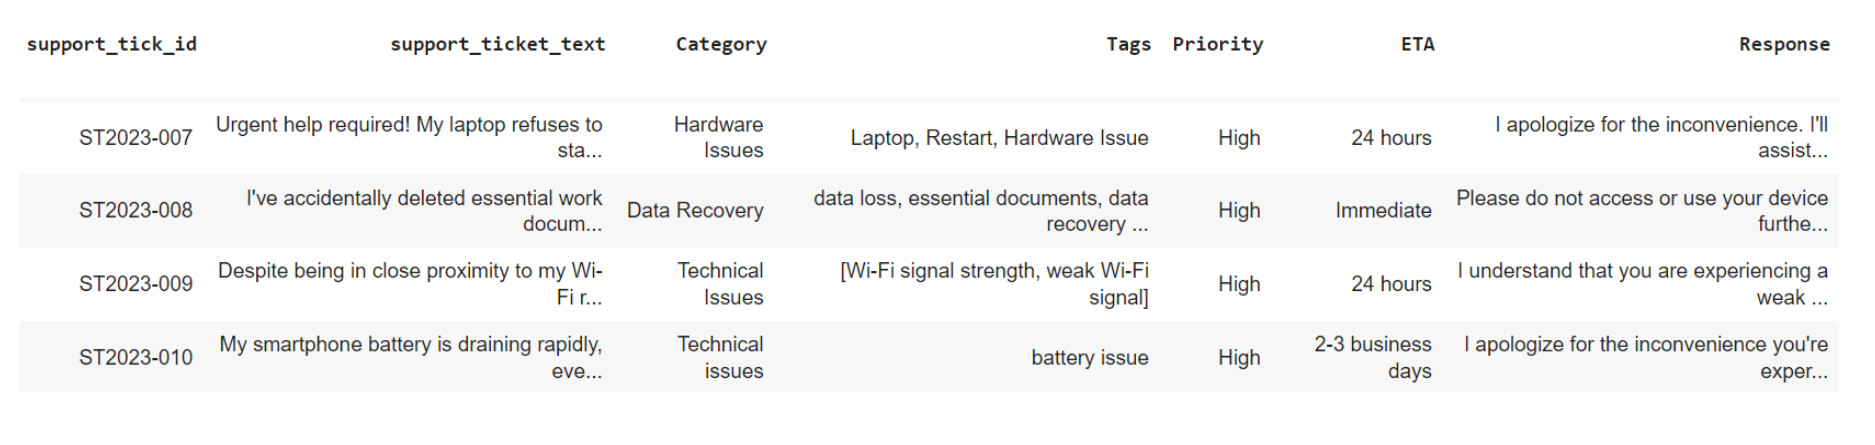

## **Please read the instructions carefully before starting the project.**

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same. Any mathematical or computational details which are a graded part of the project can be included in the Appendix section of the presentation.


**Note**: If the free-tier GPU of Google Colab is not accessible (due to unavailability or exhaustion of daily limit or other reasons), the following steps can be taken:

1. Wait for 12-24 hours until the GPU is accessible again or the daily usage limits are reset.

2. Switch to a different Google account and resume working on the project from there.

3. Try using the CPU runtime:
    - To use the CPU runtime, click on *Runtime* => *Change runtime type* => *CPU* => *Save*
    - One can also click on the *Continue without GPU* option to switch to a CPU runtime (kindly refer to the snapshot below)
    - The instructions for running the code on the CPU are provided in the respective sections of the notebook.

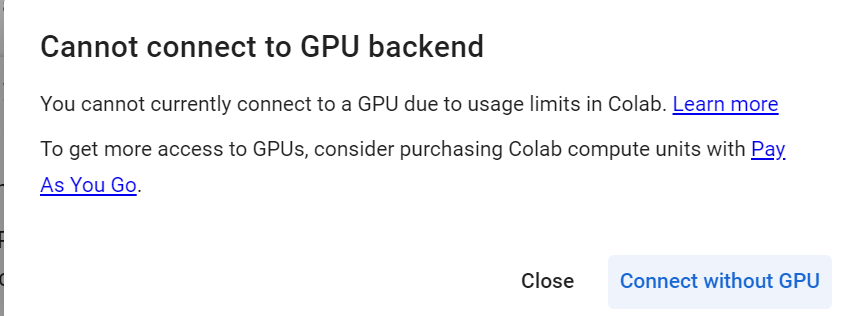

## **Installing and Importing Necessary Libraries and Dependencies**

In [ ]:
# Installation for GPU llama-cpp-python
# uncomment and run the following code in case GPU is being used

#!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

In [ ]:
# Installation for CPU llama-cpp-python
# uncomment and run the following code in case GPU is not being used

# !CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

**Note** : There may be an error related to a dependency issue thrown by the pip package. This can be ignored as it will not impact the execution of the code.

In [ ]:
# For downloading the models from HF Hub
!pip install huggingface_hub==0.20.3 pandas==1.5.3 -q

In [ ]:
# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the json module
import json

# for loading and manipulating data
import pandas as pd

# for time computations
import time

## **Loading the Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Complete the code to read the CSV file.
data = pd.read_csv("_____")

## **Data Overview**

### Checking the first 5 rows of the data

In [ ]:
# Complete the code to check the first 5 rows of the data
data._____

### Checking the shape of the data

In [ ]:
# Complete the code to check the shape of the data
data._____

### Checking the missing values in the data

In [ ]:
# Complete the code to check for missing values in the data
data._____

## **Model Building**

### Loading the model

In [ ]:
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"

In [ ]:
model_path = hf_hub_download(
    repo_id=_____, # Complete the code to mention the repo_id
    filename=_____  # Complete the code to mention the filename
)

In [ ]:
# uncomment and run the following code in case GPU is being used

# llm = Llama(
#     model_path=model_path,
#     n_ctx=1024, # Context window
# )

In [ ]:
# uncomment and run the following code in case GPU is not being used

# llm = Llama(
#     model_path=model_path,
#     n_ctx=1024, # Context window
#     n_cores=-2 # Number of CPU cores to use
# )

### Utility functions

In [ ]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

## **Task 1: Ticket Categorization and Returning Structured Output**

In [ ]:
# creating a copy of the data
data_1 = data.copy()

In [ ]:
#Defining the response funciton for Task 1.
def response_1(prompt,ticket):
    model_output = llm(
      f"""
      Q: {prompt}
      Support ticket: {ticket}
      A:
      """,
      max_tokens=_____, #Complete the code to set the maximum number of tokens the model should generate for this task.
      stop=["Q:", "\n"],
      temperature=_____, #Complete the code to set the value for temperature.
      echo=False,
    )

    temp_output = model_output["choices"][0]["text"]
    final_output = temp_output[temp_output.index('{'):]

    return final_output

In [ ]:
prompt_1 = """
    <Write the prompt for the task here>
"""

**Note**: The output of the model should be in a structured format (JSON format).

In [ ]:
start = time.time()
data_1['model_response'] = data_1['support_ticket_text'].apply(lambda x: response_1(prompt_1, x))
end = time.time()

In [ ]:
print("Time taken ",(end-start))

In [ ]:
# Write the code to check the first five rows of the data to confirm whether the new column has been added


In [ ]:
i = 2
print(data_1.loc[i, 'support_ticket_text'])

In [ ]:
print(data_1.loc[i, 'model_response'])

In [ ]:
# applying the function to the model response
data_1['model_response_parsed'] = data_1['model_response'].apply(extract_json_data)
data_1['model_response_parsed'].head()

In [ ]:
data_1['model_response_parsed'].value_counts()

In [ ]:
# Normalizing the model_response_parsed column
model_response_parsed_df_1 = pd.json_normalize(data_1['model_response_parsed'])
model_response_parsed_df_1.head()

In [ ]:
# Concatinating two dataframes
data_with_parsed_model_output_1 = pd.concat([data_1, model_response_parsed_df_1], axis=1)
data_with_parsed_model_output_1.head()

In [ ]:
# Dropping model_response and model_response_parsed columns
final_data_1 = data_with_parsed_model_output_1.drop(['model_response','model_response_parsed'], axis=1)
final_data_1.head()

## **Task 2: Creating Tags**

In [ ]:
# creating a copy of the data
data_2 = data.copy()

In [ ]:
def response_2(prompt,ticket,category):
    model_output = llm(
      f"""
      Q: {prompt}
      Support ticket: {ticket}
      Category: {category}
      A:
      """,
      max_tokens=_____, #Complete the code to set the maximum number of tokens the model should generate for this task.
      stop=["Q:", "\n"],
      temperature=_____, #Complete the code to set the value for temperature.
      echo=False,
    )

    temp_output = model_output["choices"][0]["text"]
    final_output = temp_output[temp_output.index('{'):]

    return final_output

In [ ]:
prompt_2 = """
   <Write the prompt for the task here>
"""

**Note**: The output of the model should be in a structured format (JSON format).

In [ ]:
start = time.time()
data_2["model_response"]=final_data_1[['support_ticket_text','Category']].apply(lambda x: response_2(prompt_2, x[0],x[1]),axis =1)
end = time.time()

In [ ]:
print("Time taken ",end-start)

In [ ]:
# Write the code to check the first five rows of the data to confirm whether the new column has been added


In [ ]:
i = 2
print(data_2.loc[i, 'support_ticket_text'])

In [ ]:
print(data_2.loc[i, 'model_response'])

In [ ]:
# Applying the function to the model response
data_2['model_response_parsed'] = data_2['model_response'].apply(extract_json_data)

In [ ]:
data_2["model_response_parsed"]

In [ ]:
# Normalizing the model_response_parsed column
model_response_parsed_df_2 = pd.json_normalize(data_2['model_response_parsed'])
model_response_parsed_df_2.head()

In [ ]:
# Concatinating two dataframes
data_with_parsed_model_output_2 = pd.concat([data_2, model_response_parsed_df_2], axis=1)
data_with_parsed_model_output_2.head()

In [ ]:
# Dropping model_response and model_response_parsed columns
final_data_2 = data_with_parsed_model_output_2.drop(['model_response','model_response_parsed'], axis=1)
final_data_2.head()

In [ ]:
# Checking the value counts of Category column
final_data_2['Tags'].value_counts()

In [ ]:
final_data_2 = pd.concat([final_data_2,final_data_1["Category"]],axis=1)

In [ ]:
final_data_2 = final_data_2[["support_tick_id","support_ticket_text","Category","Tags"]]
final_data_2

## **Task 3: Assigning Priority and ETA**

In [ ]:
# creating a copy of the data
data_3 = data.copy()

In [ ]:
def response_3(prompt,ticket,category,tags):
    model_output = llm(
      f"""
      Q: {prompt}
      Support ticket: {ticket}
      Category: {category}
      Tags: {tags}
      A:
      """,
      max_tokens=_____,  #Complete the code to set the maximum number of tokens the model should generate for this task.
      stop=["Q:", "\n"],
      temperature=_____, #Complete the code to set the value for temperature.
      echo=False,
    )

    temp_output = model_output["choices"][0]["text"]
    final_output = temp_output[temp_output.index('{'):]

    return final_output

In [ ]:
prompt_3 = """
    <Write the prompt for the task here>
"""

**Note**: The output of the model should be in a structured format (JSON format).

In [ ]:
# Applying generate_llama_response function on support_ticket_text column
start = time.time()
data_3['model_response'] = final_data_2[['support_ticket_text','Category','Tags']].apply(lambda x: response_3(prompt_3, x[0],x[1],x[2]),axis=1)
end = time.time()

In [ ]:
print("Time taken ",(end-start))

In [ ]:
# Write the code to check the first five rows of the data to confirm whether the new column has been added


In [ ]:
i = 2
print(data_3.loc[i, 'support_ticket_text'])

In [ ]:
print(data_3.loc[i, 'model_response'])

In [ ]:
# Applying the function to the model response
data_3['model_response_parsed'] = data_3['model_response'].apply(extract_json_data)
data_3['model_response_parsed'].head()

In [ ]:
# Normalizing the model_response_parsed column
model_response_parsed_df_3 = pd.json_normalize(data_3['model_response_parsed'])
model_response_parsed_df_3.head(21)

In [ ]:
# Concatinating two dataframes
data_with_parsed_model_output_3 = pd.concat([data_3, model_response_parsed_df_3], axis=1)
data_with_parsed_model_output_3.head()

In [ ]:
# Dropping model_response and model_response_parsed columns
final_data_3 = data_with_parsed_model_output_3.drop(['model_response','model_response_parsed'], axis=1)
final_data_3.head()

In [ ]:
final_data_3 = pd.concat([final_data_3,final_data_2[["Category","Tags"]]],axis=1)

In [ ]:
final_data_3 = final_data_3[["support_tick_id","support_ticket_text","Category","Tags","Priority","ETA"]]

In [ ]:
final_data_3

## **Task 4 - Creating a Draft Response**

In [ ]:
# creating a copy of the data
data_4 = data.copy()

In [ ]:
def response_4(prompt,ticket,category,tags,priority,eta):
    model_output = llm(
      f"""
      Q: {prompt}
      Support ticket: {ticket}
      Category : {category}
      Tags : {tags}
      Priority: {priority}
      ETA: {eta}
      A:
      """,
      max_tokens=_____, #Complete the code to set the maximum number of tokens the model should generate for this task.
      stop=["Q:", "\n"],
      temperature=_____, #Complete the code to set the value for temperature.
      echo=False,
    )

    temp_output = model_output["choices"][0]["text"]


    return temp_output

In [ ]:
prompt_4 = """
    <Write the prompt for the task here>
"""

**Note** : For this task, we will not be using the *`extract_json_data`* function. Hence, the output from the model should be a plain string and not a JSON object.

In [ ]:
#Applying generate_llama_response function on support_ticket_text column
start = time.time()
data_4['model_response'] = final_data_3[['support_ticket_text','Category','Tags','Priority','ETA']].apply(lambda x: response_4(prompt_4, x[0],x[1],x[2],x[3],x[4]),axis=1)
end = time.time()

In [ ]:
print("Time taken",(end-start))

In [ ]:
# Write the code to check the first five rows of the data to confirm whether the new column has been added


In [ ]:
i = 2
print(data_4.loc[i, 'support_ticket_text'])

In [ ]:
print(data_4.loc[i, 'model_response'])

In [ ]:
final_data_4 = pd.concat([final_data_3,data_4["model_response"]],axis=1)

In [ ]:
final_data_4.rename(columns={"model_response":"Response"},inplace=True)

In [ ]:
final_data_4

## **Model Output Analysis**

In [ ]:
# Creating a copy of the dataframe of task-4
final_data = final_data_4.copy()

In [ ]:
final_data['_____'].value_counts()    # complete the code with the column name for the column containing ticket categories

In [ ]:
final_data["_____"].value_counts() # complete the code with the column name for the column containing the priorities of the ticket.

In [ ]:
final_data["_____"].value_counts()# complete the code with the column name for the column containing ticket resolution ETA.

Let's dive in a bit deeper here.

In [ ]:
final_data.groupby(['_____', '_____']).support_tick_id.count() # complete the code to group by based on the categories and ETA.

## **Actionable Insights and Recommendations**

*


<font size=6 color='blue'>Power Ahead</font>
___